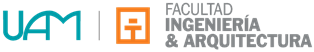

# 📝 Notebook: Práctica#3 | Consultas a la BD Northwind

## (20 puntos)

**Nombre del integrante #1: Roderick Uziel Caldera Torres**

**Nombre del integrante #2: Franya Dalila Gutiérrez López**

Esta práctica evalúa el dominio de la sentencia SELECT en SQL Server, incluyendo filtros, ordenamientos, uniones, agrupaciones y subconsultas.

✍️ **Instrucciones:**

- Lee atentamente cada enunciado.
- Escribe tu consulta T-SQL en una celda de código debajo del requerimiento
- Verifica que la sintaxis sea correcta antes de ejecutar.
- Documenta la sentencia resultante mediante celda de texto

## 📝 Ejercicio 1

### Mostrar el nombre de los productos y su precio unitario, únicamente aquellos con precio entre 20 y 50, ordenados de mayor a menor precio.

## Documentación

- Se usa **SELECT** para mostrar únicamente las columnas que se pide mostrar, en este caso son: el nombre de los productos (_Products.ProductName_) y el precio unitario de los mismos (_Products.UnitPrice_) con aliases para mejorar la forma en que se muestran
- Se usa **FROM** para especificar el origen de los datos. En este caso, como se pide mostrar datos de la tabla de Productos, es esa tabla la que se consulta y se le asigna un alias "_p_" para hacer la consulta más corta y legible
- Se usa **WHERE** para filtrar los datos especificios solicitados, en este caso se solicitó mostrar aquellos cuyo precio oscila entre los 20 y 50. Se usó **BETWEEN** porque permite filtrar un rango determinado y **AND** para combinar el rango solicitado
- Se usa **ORDER BY** para ordenar la tabla a mostrar en order descendente según los datos de _Products.UnitPrice_, mostrandolos de mayor a menor.

In [ ]:
SELECT p.ProductName AS Producto, p.UnitPrice AS Precio
FROM Products AS p
WHERE p.UnitPrice BETWEEN 20 AND 50
ORDER BY p.UnitPrice DESC;

## 📝 Ejercicio 2

### Listar los países únicos donde residen los clientes que tienen un nombre de contacto que comience con la letra 'A'.

## Documentación

- Como se pide retornar países ÚNICOS, se usa SELECT DISTINCT para listar los paises sin datos duplicados. Con un alias para mejorar la vista del listado
- Se usa **FROM** para seleccionar el origen de los datos. En este caso, como se pide listar datos de la tabla de Customers, es esa tabla la que se consulta y se le asigna un alias "_cu_" para hacer la consulta más corta y legible
- Se usa **WHERE** para filtrar los datos especificios solicitados, en este caso se pide que su nombre de contacto comience con la letra "A", para ello se usa LIKE, pues nos permite buscar un patrón en los registros del campo de ContactName.
- Se usa **ORDER BY** para ordenar la tabla a listar segun los registros de Customers.Country. Su valor por defecto es ASC, así que se mostraran en orden alfabetico.

In [ ]:
SELECT DISTINCT cu.Country AS Pais
FROM Customers as cu
WHERE cu.ContactName LIKE 'A%'
ORDER BY cu.Country;

## 📝 Ejercicio 3

### Obtener el nombre del producto, el nombre de la categoría y el nombre del proveedor de cada producto.

## Documentación

- Se usa **SELECT** para mostrar únicamente las columnas que se pide mostrar, en este caso son: 
    - El nombre de producto (p.ProductName) que viene de la tabla de Products y se le asigna el alias de Producto. 
    - El nombre de la categoría (c.CategoryName) que viene de la tabla de Categories y se le asigna el alias de Categoria
    - El nombre del proovedor (s.CompanyName) que viene de la tabla de Suppliers y se le asigna el alias de Proveedor
- Se usa FROM para específicar la tabla destino de la consulta principal. Como lo que se quiere conocer son datos de Producto, y las conexiones (llaves foraneas) de categoria y proveedor son parte de la tabla Products, pues esa es la que se está instanciando en la consulta; con el alias _p,_ para mejorar la lectura
- Se usa JOIN para unir la tabla de Categories. A este se le asigna el alias _c._ De igual forma en la siguiente linea, se usa JOIN para unir la tabla de Suppliers  y se le asigna como alias _s._ El ON en ambas lineas indica la condición de emparejamiento; 
    - Que la llave foranea en Products(CategoryID) coincida con la llave primaria en Categories(CategoryID)
    - Que la llave foranea en Products(SupplierID) coincida con la llave primaria en Suppliers (SupplierID)
- Se usa **ORDER BY** para ordenar la tabla a listar segun los registros de Products.ProductName en orden ascendente (el orden por defecto)

In [ ]:
SELECT p.ProductName AS Producto, c.CategoryName AS Categoria, s.CompanyName AS Proveedor
FROM Products AS p
JOIN Categories AS c ON p.CategoryID = c.CategoryID
JOIN Suppliers AS s ON p.SupplierID = s.SupplierID
ORDER BY p.ProductName;

## 📝 Ejercicio 4

### Mostrar el número de pedidos realizados por cada cliente, solo para aquellos que tengan más de 10 pedidos.

## Documentación

- Se usa **SELECT** para mostrar únicamente las columnas que se pide mostrar, en este caso son: 
    - El nombre del cliente (c.CompanyName) con alias Cliente
    - La cantidad de ordenes, la cual se calcula en la consulta con la funcion COUNT que nos permite contar la cantidad de registros que existen y están asignados  un cliente. Basicamente se cuenta la cantidad de registros facturados a algun cliente y se le asigna el alias CantidadPedidos
- Se usa **FROM** para especificar el origen de los datos. En este caso, es la tabla de Customers. Tambien se le asigna un alias _c_ para mejorar la lectura
- Se usa JOIN para unir la tabla de Orders, se le asigna el alias _o,_ siendo su condición de emparejamiento (ON) la llave primaria en Customers(CustomerID) y la llave foranea en Orders(CustomerID)
- Se usa la cláusula GROUP BY para agrupar filas que tienen los mismos valores en una o más columnas, asi solo se muestra un registro en el listado y HAVING para filtrar después de haber agrupado esos datos. Se filtran los mayores a 10, pues es lo que se pide en el ejercicio.

In [ ]:
SELECT c.CompanyName AS Cliente, COUNT(o.OrderID) AS CantidadPedidos
FROM Customers AS c
JOIN Orders AS o ON c.CustomerID = o.CustomerID
GROUP BY c.CompanyName HAVING COUNT(o.OrderID) > 10;

## 📝 Ejercicio 5

### Listar los productos cuyo precio unitario es mayor que el precio promedio de todos los productos.

## Documentación

- Se usa **SELECT** para mostrar únicamente las columnas que se consideran mostrar: 
    - El nombre del producto(Product.ProductName) con alias Producto
    - El precio unitario del producto(Product.UnitPrice) con alias de Precio
- Se usa **FROM** para especificar el origen de los datos. En este caso, es la tabla Products. Tambien se le asigna un alias _p_ para mejorar la lectura
- Se usa **WHERE** para filtrar los datos especificios solicitados, en este caso se solicitó mostrar aquellos cuyo valor sea mayor al AVARAGE de los precios de los productos. Eso es lo que realiza la clausula que está entre parentesis. Selecciona el AVARAGE del precio unitario que viene de la tabla de productos y pasa ese valor a cada uno de los registros que va pasando por ahi, para saber si ese es o no mayor a dicho promedio.
- Por ultimo se ordena el listado por orden Descendente según el precio del producto

In [ ]:
SELECT p.ProductName AS Producto, p.UnitPrice AS Precio
FROM Products AS p
WHERE p.UnitPrice > (Select AVG(UnitPrice) FROM Products)
ORDER BY UnitPrice DESC;

## 📝 Ejercicio 6

### Mostrar el nombre de cada categoría y el precio promedio de los productos de esa categoría, usando una subconsulta en la cláusula FROM.

## Documentación

- Se usa **SELECT** para mostrar únicamente las columnas que se consideran mostrar: 
    - El nombre de la categoria(Categories.CategoryName) con alias Categoria que viene de la subconsulta _t_
    - El precio promedio de products de la categoria (AVG(Products.UnitPrice)) con alias de PrecioPromedio, calculado en la subconsulta
- Se usa FROM para indicar el origen de los datos, en este caso se originan en la subconsulta alias _t,_ construye una tabla temporal
- Dentro de la subconsulta:
    - Se seleccionan los campos a mostrar:
        - Categories.CategoryName y el AVG de Products.UnitPrice
    - Se declara el origen de los datos, el cual es la tabla Productos, pues se quiere mostrar el precio promedio de ellos.
    - Se une la tabla de categorias, siendo su condición de emparejamiento la llave foranea en Products (Products.CategoryID) y la llave primaria en Categories (Categories.CategoryID)
    - Se agrupan los productos por nombre de categoria, para que el avg se compute por grupos
- Se ordena la tabla por el nombre de la categoria en su orden por defecto (ascendente)

In [24]:
SELECT t.CategoryName AS Categoria, t.AvgPrice AS PrecioPromedio
FROM (SELECT c.CategoryName, AVG(p.UnitPrice) AS AvgPrice
        FROM Products p
        JOIN Categories c ON p.CategoryID = c.CategoryID
        GROUP BY c.CategoryName) AS t
ORDER BY t.CategoryName;


(8 rows affected)

Total execution time: 00:00:00.014

Categoria,PrecioPromedio
Beverages,37.9791
Condiments,23.0625
Confections,25.16
Dairy Products,28.73
Grains/Cereals,20.25
Meat/Poultry,54.0066
Produce,32.37
Seafood,20.6825
